In [1]:
# import required libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Reshape, Dropout 
from tensorflow.keras.models import Model

In [3]:
# check if GPU is available
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
# load MNIST fashion dataset 
fashion_mnist = tf.keras.datasets.fashion_mnist

# assign train and test data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("Shape of x_train: ", x_train.shape)

Shape of x_train:  (60000, 28, 28)


In [6]:
# since our images are 28x28, we need to reshape the data to include the channel dimension by adding a dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("Shape of x_train: ", x_train.shape)

Shape of x_train:  (60000, 28, 28, 1)


In [7]:
# find number of classes
k = np.unique(y_train).shape[0]
print("Number of classes: ", k)


Number of classes:  10


In [15]:
# build the model using functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(filters=32, kernel_size=3, strides=2, activation='relu')(i)
x = Conv2D(filters=64, kernel_size=3, strides=2, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(inputs=i, outputs=x)

In [22]:
# compile and fit the model using CPU
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1725 - accuracy: 0.9356 - val_loss: 0.3173 - val_accuracy: 0.9025
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1678 - accuracy: 0.9361 - val_loss: 0.3275 - val_accuracy: 0.9003
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1635 - accuracy: 0.9388 - val_loss: 0.3382 - val_accuracy: 0.8952
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1570 - accuracy: 0.9415 - val_loss: 0.3182 - val_accuracy: 0.8997
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1522 - accuracy: 0.9427 - val_loss: 0.3428 - val_accuracy: 0.9007
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1457 - accuracy: 0.9451 - val_loss: 0.3398 - val_accuracy: 0.8994
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1417 - accuracy: 0.9462 - val_loss: 0.3632 - val_accuracy:

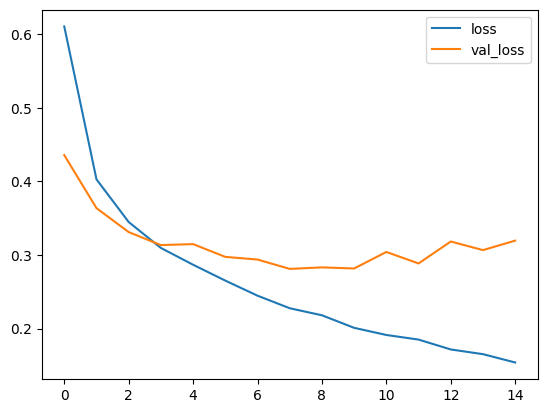

In [17]:
# plot loss per epoch
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

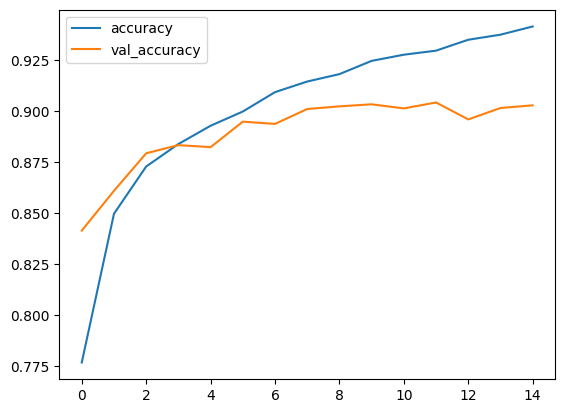

In [18]:
# plot accuracy per epoch
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [19]:
# labels labeling
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split('\n')

In [20]:
# find prediction for test data
p_test = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'True label: Sneaker, Predicted label: Sandal')

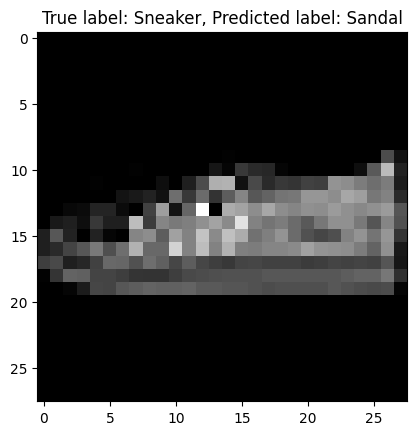

In [21]:
# show some misclassified images
misclassified_images = np.where( p_test != y_test)[0]
i = np.random.choice(misclassified_images)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title(f"True label: {labels[y_test[i]]}, Predicted label: {labels[p_test[i]]}")